**Import Libraries**

In [1]:
# Import Modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from joblib import dump, load

**Load Dataset**

In [2]:
df = pd.read_csv(r"D:\BINUS\... SEMESTER 4\Research Methodology in Computer Science\AOL\Models\stroke_risk_dataset.csv")

In [3]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


**Preprocessing**

In [4]:
df = df.drop(columns=['Stroke Risk (%)'])

In [5]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,1


In [6]:
df.isna().sum()

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
At Risk (Binary)                  0
dtype: int64

In [7]:
correlation = df.corr(method='pearson')
df_corr = correlation['At Risk (Binary)'].sort_values(ascending=False)
print(df_corr)

At Risk (Binary)                  1.000000
Age                               0.612038
Cold Hands/Feet                   0.136642
Chest Pain                        0.135365
Snoring/Sleep Apnea               0.133681
Fatigue & Weakness                0.133060
Excessive Sweating                0.132806
High Blood Pressure               0.132301
Anxiety/Feeling of Doom           0.131466
Shortness of Breath               0.130482
Dizziness                         0.130444
Persistent Cough                  0.128700
Nausea/Vomiting                   0.128645
Irregular Heartbeat               0.124150
Chest Discomfort (Activity)       0.123640
Swelling (Edema)                  0.122416
Pain in Neck/Jaw/Shoulder/Back    0.120280
Name: At Risk (Binary), dtype: float64


**Data Splitting**

In [8]:
X = df.drop(columns=['At Risk (Binary)'])
y = df['At Risk (Binary)']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Resampling (because the dataset has imbalanced classes)

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

**Feature Scaling**

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [12]:
X_train

array([[ 1.07808996, -0.92254619, -0.92541205, ..., -0.92751504,
        -0.92797721, -1.42409424],
       [-0.92756638,  1.08395657, -0.92541205, ...,  1.07814964,
         1.07761267, -1.04396998],
       [-0.92756638,  1.08395657,  1.08059972, ..., -0.92751504,
         1.07761267,  1.71193094],
       ...,
       [ 1.07808996, -0.92254619, -0.92541205, ..., -0.92751504,
         1.07761267, -0.75887678],
       [-0.92756638,  1.08395657, -0.92541205, ...,  1.07814964,
        -0.92797721, -0.94893891],
       [-0.92756638,  1.08395657, -0.92541205, ..., -0.92751504,
        -0.92797721, -0.04614379]], shape=(72672, 16))

**Modelling**

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(X_test)

**Evaluation**

In [16]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print()

Accuracy: 0.8941428571428571

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4892
           1       0.93      0.90      0.92      9108

    accuracy                           0.89     14000
   macro avg       0.88      0.89      0.89     14000
weighted avg       0.90      0.89      0.89     14000


Confusion Matrix:
[[4292  600]
 [ 882 8226]]



**Hyper-parameter Tuning**

In [17]:
from sklearn.model_selection import GridSearchCV

- Finding optimal K

In [18]:
# def find_optimal_k(X_train, y_train, X_test, y_test, max_k=30):
#     error_rates = []

#     for k in range(1, max_k+1):
#         knn = KNeighborsClassifier(n_neighbors=k)
#         knn.fit(X_train, y_train)
#         pred = knn.predict(X_test)
#         error_rates.append(np.mean(pred != y_test))

#     optimal_k = error_rates.index(min(error_rates)) + 1
#     return optimal_k, error_rates

In [19]:
# optimal_k, error_rates = find_optimal_k(X_train, y_train, X_test, y_test)
# print("Optimal K Value: ", optimal_k)

- Finding optimal weight and distance metric

In [20]:
param_grid = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [21]:
print(f"Best Params:\n{grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Params:
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best Score: 0.9378168913110233


In [22]:
# assigning the best parameters to their own variables
best_params = grid_search.best_params_
best_k = best_params['n_neighbors']
best_w = best_params['weights']
best_metric = best_params['metric']

**Retraining with the Optimal K**

In [23]:
from sklearn.pipeline import Pipeline

In [24]:
knn_pipeline = Pipeline([
    ('knn', KNeighborsClassifier(
        n_neighbors = best_k,
        weights = best_w,
        metric = best_metric
    ))
])

In [25]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=9))])

In [26]:
y_pred_2 = knn_pipeline.predict(X_test)

**Optimal Model Performance**

In [27]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_2)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred_2)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_2)}")
print()

Accuracy: 0.9206428571428571

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4892
           1       0.95      0.93      0.94      9108

    accuracy                           0.92     14000
   macro avg       0.91      0.92      0.91     14000
weighted avg       0.92      0.92      0.92     14000


Confusion Matrix:
[[4429  463]
 [ 648 8460]]



**Saving Model**

In [ ]:
# Saving Model
dump(knn_pipeline, 'model.joblib')

['model.joblib']

In [13]:
# Loading Saved Model
loaded_model = joblib.load('model.joblib')
scaler = joblib.load('scaler.pkl')
y_pred_loaded_model = loaded_model.predict(X_test)

In [14]:
print(y_pred_loaded_model)

[1 0 0 ... 0 0 0]


In [29]:
# Jika dilakukan Feature Scaling pada data training, maka test data juga harus menggunakan Scaling yg sama (scaler.transform(features))

# new_data = scaler.transform([[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 24]]) # Not Stroke
# new_data = scaler.transform([[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 54]]) # Stroke
# new_data = scaler.transform([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 20]]) # Aurick
# new_data = scaler.transform([[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 18]]) # Kei
new_data = scaler.transform([[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 20]]) # Dewo
print(new_data)

[[-0.92756638 -0.92254619  1.08059972 -0.92700174  1.07294212 -0.93029102
   1.07243778 -0.93573504 -0.93163014 -0.9258477  -0.9303425  -0.92530957
  -0.92882504 -0.92751504 -0.92797721 -1.42409424]]


d:\Python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
blind_test = loaded_model.predict(new_data)
print(blind_test)

[0]


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(precision_score(y_test, y_pred_loaded_model))
print(recall_score(y_test, y_pred_loaded_model))
print(f1_score(y_test, y_pred_loaded_model))
print(accuracy_score(y_test, y_pred_loaded_model))

0.9481116216519108
0.9288537549407114
0.9383838944040819
0.9206428571428571


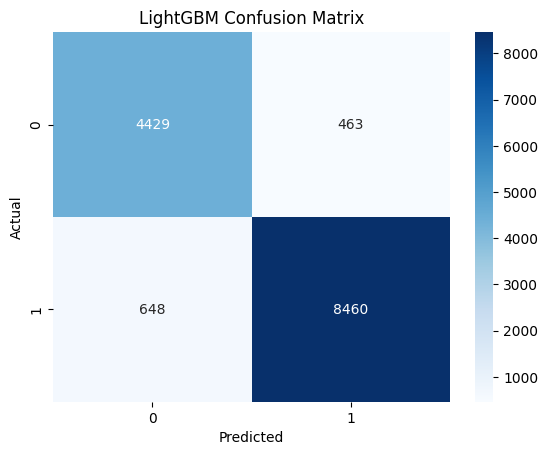

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred_loaded_model), annot=True, fmt='d', cmap='Blues')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()